In [1]:

from optibook.synchronous_client import Exchange

import logging
logger = logging.getLogger('client')
logger.setLevel('ERROR')

print("Setup was successful.")

Setup was successful.


In [2]:
e = Exchange()
a = e.connect()

2022-04-02 20:29:08,203 [asyncio   ] [MainThread  ] Using selector: EpollSelector


In [3]:
from matplotlib import pyplot as plt
import pandas as pd

2022-04-02 20:29:08,593 [matplotlib] [MainThread  ] (private) matplotlib data path: /usr/local/lib64/python3.6/site-packages/matplotlib/mpl-data
2022-04-02 20:29:08,594 [matplotlib] [MainThread  ] matplotlib data path: /usr/local/lib64/python3.6/site-packages/matplotlib/mpl-data
2022-04-02 20:29:08,599 [matplotlib] [MainThread  ] CONFIGDIR=/home/ec2-user/.config/matplotlib
2022-04-02 20:29:08,604 [matplotlib] [MainThread  ] matplotlib version 3.3.4
2022-04-02 20:29:08,605 [matplotlib] [MainThread  ] interactive is False
2022-04-02 20:29:08,606 [matplotlib] [MainThread  ] platform is linux
2022-04-02 20:29:08,607 [matplotlib] [MainThread  ] loaded modules: ['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', '

In [37]:
# Create tick historical
instrument_id = 'PHILIPS_A'
instrument_id_B = 'PHILIPS_B'

tradeticks = e.get_trade_tick_history(instrument_id)

PHILIPS_A_BID_HIST_price = []
PHILIPS_A_BID_HIST_vol = []
PHILIPS_A_ASK_HIST_price = []
PHILIPS_A_ASK_HIST_vol = []
sumtrades = 0
for t in tradeticks:
    sumtrades += t.volume
    if t.aggressor_side == "bid":
        PHILIPS_A_BID_HIST_price.append(t.price)
        PHILIPS_A_BID_HIST_vol.append(t.volume)
        #print(f"[{t.instrument_id}] price({t.price}), volume({t.volume}), aggressor_side({t.aggressor_side}), buyer({t.buyer}), seller({t.seller})")
    elif t.aggressor_side == "ask":
        PHILIPS_A_ASK_HIST_price.append(t.price)
        PHILIPS_A_ASK_HIST_vol.append(t.volume)
        #print(f"[{t.instrument_id}] price({t.price}), volume({t.volume}), aggressor_side({t.aggressor_side}), buyer({t.buyer}), seller({t.seller})")
print(sumtrades)

PHILIPS_B_BID_HIST_price = []
PHILIPS_B_BID_HIST_vol = []
PHILIPS_B_ASK_HIST_price = []
PHILIPS_B_ASK_HIST_vol = []
sumtrades = 0
tradeticks = e.poll_new_trade_ticks(instrument_id_B)
for t in tradeticks:
    sumtrades += t.volume
    if t.aggressor_side == "bid":
        PHILIPS_B_BID_HIST_price.append(t.price)
        PHILIPS_B_BID_HIST_vol.append(t.volume)
        #print(f"[{t.instrument_id}] price({t.price}), volume({t.volume}), aggressor_side({t.aggressor_side}), buyer({t.buyer}), seller({t.seller})")
    elif t.aggressor_side == "ask":
        PHILIPS_B_ASK_HIST_price.append(t.price)
        PHILIPS_B_ASK_HIST_vol.append(t.volume)
        #print(f"[{t.instrument_id}] price({t.price}), volume({t.volume}), aggressor_side({t.aggressor_side}), buyer({t.buyer}), seller({t.seller})")
print(sumtrades)  




AssertionError: Cannot call function until connected. Call connect() first

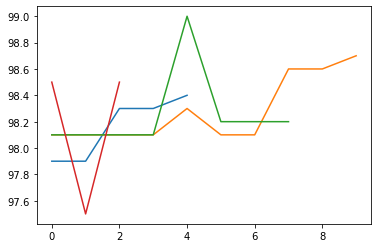

In [38]:
plt.plot(PHILIPS_A_BID_HIST_price)
plt.plot(PHILIPS_A_ASK_HIST_price)
plt.plot(PHILIPS_B_BID_HIST_price)
plt.plot(PHILIPS_B_ASK_HIST_price)

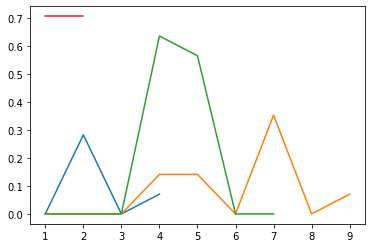

In [39]:
PHILIPS_A_BID_HIST_price_std = pd.Series(PHILIPS_A_BID_HIST_price).rolling(2).std()
PHILIPS_A_ASK_HIST_price_std = pd.Series(PHILIPS_A_ASK_HIST_price).rolling(2).std()
PHILIPS_B_BID_HIST_price_std = pd.Series(PHILIPS_B_BID_HIST_price).rolling(2).std()
PHILIPS_B_ASK_HIST_price_std = pd.Series(PHILIPS_B_ASK_HIST_price).rolling(2).std()

plt.plot(PHILIPS_A_BID_HIST_price_std)
plt.plot(PHILIPS_A_ASK_HIST_price_std)
plt.plot(PHILIPS_B_BID_HIST_price_std)
plt.plot(PHILIPS_B_ASK_HIST_price_std)

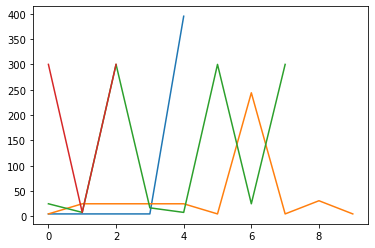

In [40]:
plt.plot(PHILIPS_A_BID_HIST_vol)
plt.plot(PHILIPS_A_ASK_HIST_vol)
plt.plot(PHILIPS_B_BID_HIST_vol)
plt.plot(PHILIPS_B_ASK_HIST_vol)


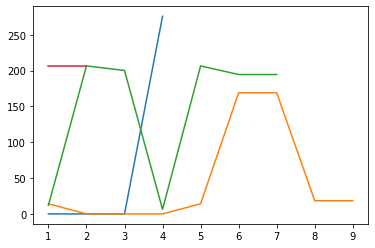

In [41]:
PHILIPS_A_BID_HIST_vol_std = pd.Series(PHILIPS_A_BID_HIST_vol).rolling(2).std()
PHILIPS_A_ASK_HIST_vol_std = pd.Series(PHILIPS_A_ASK_HIST_vol).rolling(2).std()
PHILIPS_B_BID_HIST_vol_std = pd.Series(PHILIPS_B_BID_HIST_vol).rolling(2).std()
PHILIPS_B_ASK_HIST_vol_std = pd.Series(PHILIPS_B_ASK_HIST_vol).rolling(2).std()

plt.plot(PHILIPS_A_BID_HIST_vol_std)
plt.plot(PHILIPS_A_ASK_HIST_vol_std)
plt.plot(PHILIPS_B_BID_HIST_vol_std)
plt.plot(PHILIPS_B_ASK_HIST_vol_std)